## **INTRODUCTION**

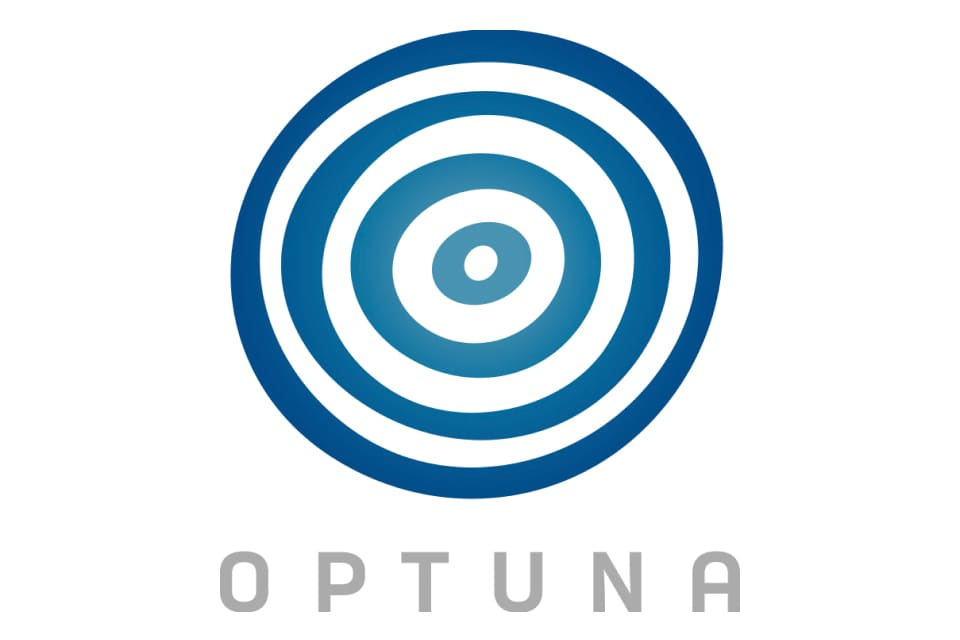




**Optuna** was developed by  the Japanese AI company Preferred Networks ,is an open-source automatic hyperparameter optimization framework, automates the trial-and-error process of optimizing the hyperparameters. It automatically finds optimal hyperparameter values based on an optimization target. Optuna is framework agnostic and can be used with most Python frameworks, including Chainer, Scikit-learn, Pytorch, etc.





***OPTUNA KEY FEATURES :***


* **Lightweight, versatile, and platform agnostic architecture**

  Optuna has minimum software dependency and hence is robust to many workflows and platforms.

* **Pythonic Search Space**

  In Optuna, we define search spaces using familiar Python syntax including conditionals and loops.Also, you can use branches or loops depending on the parameter values.

* **Efficient Optimization Algorithms**

  Optuna provides many pruning and sampling methods that allows user customization.

  Optuna enables efficient hyperparameter optimization by adopting state-of-the-art algorithms for sampling hyperparameters and pruning efficiently unpromising trials.

  Pruners automatically stop unpromising trials at the early stages of the training (a.k.a., automated early-stopping).

* **Easy Parallelization**

  Optuna provides asynchronous parallelization of trials and almost linear scalability.

* **Quick Visualization for Hyperparameter Optimization Analysis**

  Optuna provides various visualization features  to analyze optimization results visually.



## **Quick Setup and Implementation**

Optuna can be used for ML and Non-ML application task untill unless we can define objective function .

To understand the basics of Optuna , we will implement it on Non-ML task

Usually, Optuna is used to optimize hyperparameters, but as an example, let’s optimize a simple quadratic function: (x-2)**2.

### **1. Install Optuna via Pip**

In [ ]:
!pip install optuna -q

     |████████████████████████████████| 302 kB 36.0 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 164 kB 59.2 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 141 kB 45.0 MB/s 
     |████████████████████████████████| 111 kB 60.7 MB/s 


### **2. Import**

In [ ]:
#import Optuna
import optuna

### **3. Create Objective Function**
Functions that are to be optimized are named Objective

Our goal is to find the value of x that minimizes the output of the objective function. This is the “optimization.” During the optimization, Optuna repeatedly calls and evaluates the objective function with different values of x.

In [ ]:
def objective(trial):
    #trial suggesting the values for x between -100 to 100
    x = trial.suggest_uniform('x', -100, 100)
    #return the funciton value
    return (x - 2) ** 2

A Trial object corresponds to a single execution of the objective function and is internally instantiated upon each invocation of the function.

The suggest APIs (for example, suggest_float()) are called inside the objective function to obtain parameters for a trial. suggest_float() selects parameters uniformly within the range provided. In our example, from −10 to 10.


**We can dynamically construct Pythonic Search Space**

For hyperparameter sampling, Optuna provides the following features:

**optuna.trial.Trial.suggest_categorical()** for categorical parameters

**optuna.trial.Trial.suggest_int()** for integer parameters

**optuna.trial.Trial.suggest_float()** for floating point parameters

### **4. Create Study Object and Optimize it**

**Study Object**

Let us clarify the terminology in Optuna as follows:

**Trial:** A single call of the objective function

**Study:** An optimization session, which is a set of trials

**Parameter:** A variable whose value is to be optimized, such as x in the above example

In Optuna, we use the study object to manage optimization. Method create_study() returns a study object. A study object has useful properties for analyzing the optimization outcome.

To start the optimization, we create a study object and pass the objective function to method optimize() as follows

In [ ]:
# In Optuna, we use the study object to manage optimization.
# Method :optuna.create_study() returns a study object.
# A study object has useful properties for analyzing the optimization outcome.
study = optuna.create_study(direction='minimize') #Set minimize for minimization and maximize for maximization.
#To start the optimization, we create a study object and pass the objective function to method
study.optimize(objective, n_trials=100)

[I 2021-08-24 05:22:14,525] A new study created in memory with name: no-name-cdc3df2a-3b56-4795-8cc4-df9b16262f73
[I 2021-08-24 05:22:14,530] Trial 0 finished with value: 4120.194947933946 and parameters: {'x': -62.188744713804354}. Best is trial 0 with value: 4120.194947933946.
[I 2021-08-24 05:22:14,534] Trial 1 finished with value: 6211.151629073512 and parameters: {'x': 80.810859842242}. Best is trial 0 with value: 4120.194947933946.
[I 2021-08-24 05:22:14,537] Trial 2 finished with value: 2617.5471636467073 and parameters: {'x': -49.161969896073266}. Best is trial 2 with value: 2617.5471636467073.
[I 2021-08-24 05:22:14,541] Trial 3 finished with value: 7885.035319386079 and parameters: {'x': 90.79772136370437}. Best is trial 2 with value: 2617.5471636467073.
[I 2021-08-24 05:22:14,544] Trial 4 finished with value: 50.32945618908637 and parameters: {'x': -5.094325633144166}. Best is trial 4 with value: 50.32945618908637.
[I 2021-08-24 05:22:14,548] Trial 5 finished with value: 513

### **5.  Get best parameters**

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study.best_params)

# To get the best observed value of the objective function:
print("\nReturn the best observed value of the objective function:",study.best_value)

# To get the best trial:
print("\nReturn the best trial:",study.best_trial)

# To get all trials:
print("\nReturn all the trials:", study.trials)

# To get the number of trials:
print("\nReturn the number of trials :",len(study.trials))



Return a dictionary of parameter name and parameter values: {'x': 2.055182521353747}

Return the best observed value of the objective function: 0.003045110662956758

Return the best trial: FrozenTrial(number=62, values=[0.003045110662956758], datetime_start=datetime.datetime(2021, 8, 24, 5, 22, 14, 904412), datetime_complete=datetime.datetime(2021, 8, 24, 5, 22, 14, 906739), params={'x': 2.055182521353747}, distributions={'x': UniformDistribution(high=100.0, low=-100.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=62, state=TrialState.COMPLETE, value=None)

Return all the trials: [FrozenTrial(number=0, values=[4120.194947933946], datetime_start=datetime.datetime(2021, 8, 24, 5, 22, 14, 529696), datetime_complete=datetime.datetime(2021, 8, 24, 5, 22, 14, 530412), params={'x': -62.188744713804354}, distributions={'x': UniformDistribution(high=100.0, low=-100.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=Non

When used to search for hyperparameters in machine learning, usually the objective function would return the loss or accuracy of the model.

In [ ]:
#print all trial history in form of Dataframe
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_x,state
0,0,4120.194948,2021-08-24 05:22:14.529696,2021-08-24 05:22:14.530412,0 days 00:00:00.000716,-62.188745,COMPLETE
1,1,6211.151629,2021-08-24 05:22:14.533611,2021-08-24 05:22:14.534136,0 days 00:00:00.000525,80.810860,COMPLETE
2,2,2617.547164,2021-08-24 05:22:14.537022,2021-08-24 05:22:14.537604,0 days 00:00:00.000582,-49.161970,COMPLETE
3,3,7885.035319,2021-08-24 05:22:14.540476,2021-08-24 05:22:14.541083,0 days 00:00:00.000607,90.797721,COMPLETE
4,4,50.329456,2021-08-24 05:22:14.543844,2021-08-24 05:22:14.544445,0 days 00:00:00.000601,-5.094326,COMPLETE
...,...,...,...,...,...,...,...
95,95,2.039468,2021-08-24 05:22:15.146496,2021-08-24 05:22:15.152133,0 days 00:00:00.005637,0.571900,COMPLETE
96,96,285.005088,2021-08-24 05:22:15.156479,2021-08-24 05:22:15.160804,0 days 00:00:00.004325,18.882094,COMPLETE
97,97,635.202055,2021-08-24 05:22:15.167223,2021-08-24 05:22:15.176133,0 days 00:00:00.008910,-23.203215,COMPLETE
98,98,142.190427,2021-08-24 05:22:15.180594,2021-08-24 05:22:15.184323,0 days 00:00:00.003729,-9.924363,COMPLETE


### **6. Visualize the above hyperparameter optimization study**

In [ ]:
#importing all the plot functions
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history


In [ ]:
# Visualize the optimization history. See :func: optuna.visualization.plot_optimization_history for more details.
plot_optimization_history(study)

In [ ]:
# Visualize empirical distribution function. See :func optuna.visualization.plot_edf for the details.
plot_edf(study)